**STLForecaster:**
https://www.sktime.net/en/stable/api_reference/auto_generated/sktime.forecasting.trend.STLForecaster.html

In [ ]:
# Install sktime
!pip install sktime[all_extras]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.3/50.3 kB 2.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 978.3/978.3 kB 51.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 974.9/974.9 kB 44.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 87.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 55.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 395.9/395.9 kB 26.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 689.1/689.1 kB 39.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.4/72.4 MB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.5/151.5 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 880.6/880.6 kB 46.7 MB/s 

In [ ]:
#Import required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sktime.utils.plotting import plot_series
from sktime.utils.plotting import plot_windows

from sktime.forecasting.base import ForecastingHorizon
from sktime.split import temporal_train_test_split
from sktime.forecasting.model_selection import ForecastingGridSearchCV
from sktime.performance_metrics.forecasting import MeanSquaredError, MeanSquaredPercentageError
from sktime.performance_metrics.forecasting import mean_absolute_percentage_error
from sktime.forecasting.trend import STLForecaster
from sktime.forecasting.trend import PolynomialTrendForecaster
from sktime.split import (
    ExpandingWindowSplitter,
    SingleWindowSplitter,
    SlidingWindowSplitter,
)
#=============================================================
# Following are some useful forecasters rather than PolynomialTrendForecaster

#from sktime.forecasting.naive import NaiveForecaster
#from sktime.forecasting.ets import AutoETS
#from sktime.forecasting.model_evaluation import evaluate
#forecaster = NaiveForecaster(strategy="last", sp=25)
#from sktime.datasets import load_longley
#from sktime.forecasting.sarimax import SARIMAX
#forecaster = SARIMAX(order=(1, 0, 0), trend="t", seasonal_order=(1, 0, 0, 6))
#from sktime.forecasting.exp_smoothing import ExponentialSmoothing
#forecaster = ExponentialSmoothing(sp=25)
#from sktime.forecasting.arima import ARIMA
#from sktime.forecasting.arima import AutoARIMA
#forecaster = AutoARIMA(sp=27, suppress_warnings=True)
#from sktime.forecasting.fbprophet import Prophet
#from sktime.forecasting.naive import NaiveForecaster
#from sktime.forecasting.ets import AutoETS
#from sktime.forecasting.exp_smoothing import ExponentialSmoothing
#from sktime.forecasting.arima import AutoSARIMA
#from statsmodels.tsa.ar_model import AutoReg

**Load data and split it to train/test sets**

In [ ]:
# Load data
sourceName = 'PG1553M113'
data = pd.read_csv('PG1553M113.csv', usecols=['Date (UTC)', 'Flux'])
# Data preparation
# ==============================================================================
data = data.rename(columns={'Date (UTC)': 'date'})
data = data.rename(columns={'Flux': 'y'})
data = data[0:201]
max_value = data['y'].max()
data['y'] = (data['y'])/(max_value)
data['date'] = pd.to_datetime(data['date'], format='%m/%d/%Y') # %Y-%m-%d %H:%M:%S
data['date'] = data['date'].dt.to_period('M')
data = data.set_index('date')
data = data.asfreq('M')
data = data.sort_index()
print(data.head(10))

# Split time series to train/test sets
y_train, y_test = temporal_train_test_split(data, test_size=48)
print(y_train, y_test)

                y
date             
2008-08  0.500000
2008-09  0.297351
2008-10  0.362252
2008-11  0.499338
2008-12  0.320530
2009-01  0.254967
2009-02  0.203311
2009-03  0.220530
2009-04  0.266225
2009-05  0.206623
                y
date             
2008-08  0.500000
2008-09  0.297351
2008-10  0.362252
2008-11  0.499338
2008-12  0.320530
...           ...
2020-12  0.551656
2021-01  1.000000
2021-02  0.662252
2021-03  0.641060
2021-04  0.953642

[153 rows x 1 columns]                 y
date             
2021-05  0.465563
2021-06  0.913907
2021-07  0.854305
2021-08  0.554305
2021-09  0.550331
2021-10  0.469536
2021-11  0.548344
2021-12  0.539735
2022-01  0.695364
2022-02  0.570861
2022-03  0.429801
2022-04  0.243046
2022-05  0.415232
2022-06  0.331788
2022-07  0.337086
2022-08  0.347682
2022-09  0.304636
2022-10  0.478146
2022-11  0.541060
2022-12  0.375497
2023-01  0.386755
2023-02  0.347682
2023-03  0.417219
2023-04  0.768212
2023-05  0.649669
2023-06  0.652980
2023-07  0.841060
2023

**STLForecaster**

Fitting 1 folds for each of 24 candidates, totalling 24 fits
MAPE:  0.29711372229839167
Strength of Trend: 0.56
Strength of Seasonality: 0.55
Strength of Remainder: 0.46
best_params:  
 {'forecaster_trend': PolynomialTrendForecaster(), 'seasonal': 17, 'sp': 25}
best_forecaster:  
 STLForecaster(forecaster_trend=PolynomialTrendForecaster(), seasonal=17, sp=25)
cv_results_.head:  
     mean_test_MeanSquaredError  mean_fit_time  mean_pred_time  \
0                     0.218808       0.366421        0.234906   
1                     0.206193       0.641520        0.205041   
2                     0.208866       0.091772        0.189708   
3                     0.177952       0.107610        0.136502   
4                     0.174310       0.089960        0.113060   
5                     0.202034       0.114451        0.096900   
6                     0.211113       0.091227        0.126240   
7                     0.214755       0.067773        0.146280   
8                     0.218501  

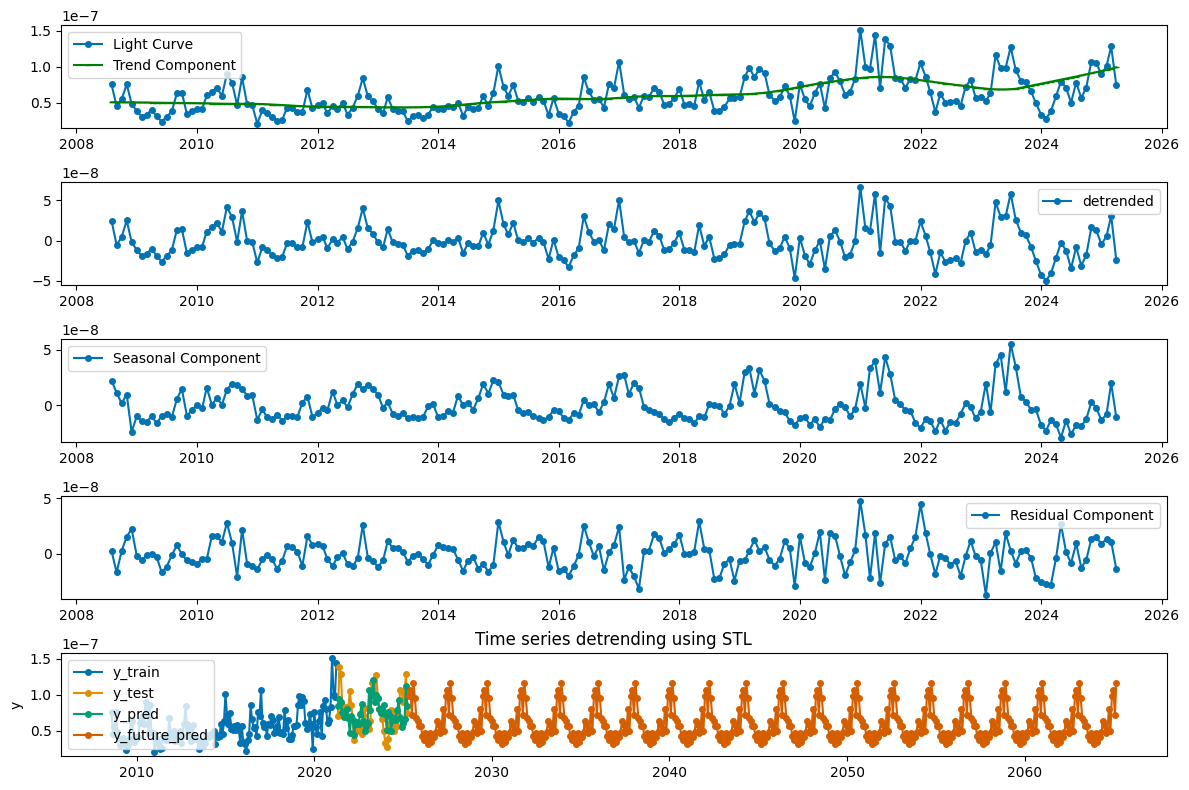

In [ ]:
# Define a forecasting horizon

fh = ForecastingHorizon(y_test.index, is_relative=False).to_relative(
    cutoff=y_train.index[-1])

# Cross validaton and parameters search

cv = SingleWindowSplitter(fh=fh, window_length=len(y_train))
#cv = ExpandingWindowSplitter(fh=fh, initial_window=20, step_length=1)

forecaster = STLForecaster()
param_grid = {
    # three hyperparameters sp, seasonal, and forecaster_trend
    "sp": [21,22,23,24,25,26,27,28], #[11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,41,43,45,47,49], #around the reported period from our analysis/lituratures
    "seasonal": [17,21,23], #[17,19,21,23,25,27,29,31,33,35,37,39,41,43,45], #odd number  ,27,29,31,33,35,37,39,41,43,45,47,49
    #"trend": [35,39,41,43,47,51,61,71,81,91,101,111,121,131,141,151],
    #"trend_deg": [0,1],
    #"forecaster_trend": [NaiveForecaster(strategy="drift")],
    #"forecaster_trend": [PolynomialTrendForecaster(regressor="AutoReg")],#regressor="ResNetRegressor",
    "forecaster_trend": [PolynomialTrendForecaster(degree=0)],
    "forecaster_trend": [PolynomialTrendForecaster(degree=1)],
    #"forecaster_trend": [PolynomialTrendForecaster(degree=2)],
    #"forecaster_trend": [PolynomialTrendForecaster(degree=3)],
    #"forecaster_trend": [PolynomialTrendForecaster(degree=4)],
    #"forecaster_trend": [AutoARIMA()],
    #"forecaster_trend": [AutoETS(auto=True)],
    #"forecaster_trend": [ExponentialSmoothing(trend="additive", damped_trend=True)],
    #"forecaster_seasonal": [NaiveForecaster(strategy="last")],
    #"forecaster_seasonal": [PolynomialTrendForecaster(degree=2)],
    #"forecaster_seasonal": [AutoARIMA()],
    #"forecaster_seasonal": [AutoARIMA()],
    #"forecaster_seasonal": [AutoETS(auto=True)],
    #"forecaster_resid": [AutoARIMA(1,1,0)],
}
gscv = ForecastingGridSearchCV(
    forecaster=forecaster,
    param_grid=param_grid,
    cv=cv,
    verbose=1,
    scoring=MeanSquaredError(square_root=True),
)
gscv.fit(y_train)
y_pred = gscv.predict(fh=fh)
y_pred_on_test_set = y_pred * max_value
np.savetxt('y_pred_on_test_set_' + str(sourceName) + '.txt', y_pred_on_test_set)

#rmse = MeanSquaredError(y_test, y_pred, square_root=True)
#rmspe =  MeanSquaredPercentageError(y_test, y_pred, square_root=True)
mape = abs((np.array(y_test) - np.array(y_pred))/np.array(y_test)).mean()
print("MAPE: ", mape)

#===============================================================================================
# Predict future period using the best forecaster/parameters from the grid search
# Initialize and fit the STLForecaster model for decomposition and forecasting

stlf = STLForecaster(sp=25, seasonal=23, forecaster_trend=PolynomialTrendForecaster(degree=1))
res = stlf.fit(data)

fh = np.arange(1, 48)
trend = res.trend_ * max_value
seasonal = res.seasonal_ * max_value
residual = res.resid_ * max_value
detrended = seasonal + residual

y_future_pred = stlf.predict(fh=fh)
y_future_pred = y_future_pred * max_value

components = np.column_stack((trend, seasonal, residual))
np.savetxt('components_' + str(sourceName) + '.txt', components)
np.savetxt('future_' + str(sourceName) + '.txt', y_future_pred)

#computing strength of trend and seasonality

TR = trend + residual
SR = seasonal + residual
Ft = 1-(np.var(residual)/np.var(TR))
Fs = 1-(np.var(residual)/np.var(SR))
Fr = 1-(np.var(seasonal)/np.var(SR))
print(f"Strength of Trend: {Ft:.2f}")
print(f"Strength of Seasonality: {Fs:.2f}")
print(f"Strength of Remainder: {Fr:.2f}")

print("best_params: ",'\n', gscv.best_params_)
print("best_forecaster: ",'\n', gscv.best_forecaster_)
print("cv_results_.head: ",'\n', gscv.cv_results_.head(30))
print("score", gscv.scoring)

# Plot the components

fig, axs = plt.subplots(5, 1, figsize=(12, 8))

plot_series(data * max_value, labels=["Light Curve"], ax=axs[0])
plot_series(trend, markers='_', colors='g', labels=["Trend Component"], ax=axs[0])
plot_series(detrended, labels=["detrended"], ax=axs[1])
plot_series(seasonal, labels=["Seasonal Component"], ax=axs[2])
plot_series(residual, labels=["Residual Component"], ax=axs[3])
plot_series(y_train * max_value, y_test * max_value, y_pred_on_test_set, y_future_pred, ax=axs[4], labels=["y_train", "y_test", "y_pred", "y_future_pred"]);#, y_future_pred   , "y_future_pred"
plt.tight_layout()
plt.title(f"Time series detrending using STL")
#ax.text(2014, 8, f"MAPE: {mape:.2f}", fontsize=12)
plt.savefig('Time_series_forecasting' + str(sourceName))
plt.show()